<a href="https://colab.research.google.com/github/ryanmdpeters21/Data-Analysis/blob/main/Football_Analytics_with_Python_chap7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
"""WEB SCRAPING: OBTAINING AND ANALYZING DRAFT PICKS"""

'WEB SCRAPING: OBTAINING AND ANALYZING DRAFT PICKS'

In [3]:
# We want to scape NFL Draft data from Pro Football Reference.
# We start my installing and importing our packages.
!pip install pandas
!pip install statsmodels
!pip install matplotlib
!pip install seaborn
!pip install numpy

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np

In [5]:
# We want to check the webpage to gather the url first.
url = 'https://www.pro-football-reference.com/years/2022/draft.htm'

# We use .read_html from pandas to gather the data.
draft_py = pd.read_html(url, header=1)[0]

# We change all null values to 0
draft_py.loc[draft_py['DrAV'].isnull(), 'DrAV'] = 0
print(draft_py)

    Rnd Pick   Tm              Player Pos Age    To AP1 PB St  ... Yds.1 TD.1  \
0     1    1  JAX       Travon Walker  DE  21  2023   0  0  1  ...     0    0   
1     1    2  DET    Aidan Hutchinson  DE  22  2023   0  1  1  ...     0    0   
2     1    3  HOU  Derek Stingley Jr.  CB  21  2023   0  0  1  ...     0    0   
3     1    4  NYJ       Sauce Gardner  CB  22  2023   1  2  1  ...     0    0   
4     1    5  NYG   Kayvon Thibodeaux  DE  21  2023   0  0  1  ...     0    0   
..   ..  ...  ...                 ...  ..  ..   ...  .. .. ..  ...   ...  ...   
263   7  258  GNB        Samori Toure  WR  24  2023   0  0  0  ...     0    0   
264   7  259  KAN      Nazeeh Johnson   S  24  2022   0  0  0  ...     0    0   
265   7  260  LAC      Zander Horvath  RB  23  2022   0  0  0  ...     8    0   
266   7  261  LAR           AJ Arcuri  OT  25  2022   0  0  0  ...     0    0   
267   7  262  SFO         Brock Purdy  QB  22  2023   0  1  0  ...   157    3   

    Rec Yds.2 TD.2 Solo Int

In [6]:
# Let's download more data.
# We create a for loop to cycle through the years.
# We must tell pandas to start at the second row (header=1, python starts count at 0)
# We can remove rows that contain extra information.
# We will save only rows whose value is not equal to the column's name.
draft_py = pd.DataFrame()
for i in range(2000, 2022+1):
  url = 'https://www.pro-football-reference.com/years/' + \
        str(i) + \
        '/draft.htm'
  web_data = pd.read_html(url, header=1)[0]
  web_data['Season'] = i
  web_data = web_data.query('Tm != "Tm"')
  draft_py = pd.concat([draft_py, web_data])

draft_py.reset_index(drop=True, inplace=True)

In [7]:
# We must change some team names due to relocation over the years.
# We will use np.select() to change team names.
# Chargers moved to LA from San Diego
# Raiders moved from Oakland to LV
# Rams moved from St.Louis to LA
conditions = [
    (draft_py.Tm == "SDG"),
    (draft_py.Tm == "OAK"),
    (draft_py.Tm == "STL"),
]
choices = ['LAC', 'LVR', 'LAR']

draft_py['Tm'] = \
  np.select(conditions, choices, default = draft_py.Tm)

# Finally, we can replace missing draft values w/ 0
draft_py.loc[draft_py['DrAV'].isnull(), 'DrAV'] = 0
draft_py.to_csv('data_py.csv', index=False)

In [8]:
# Let's take a look at our data.
print(draft_py.head())

  Rnd Pick   Tm           Player Pos Age    To AP1 PB St  ... TD.1  Rec Yds.2  \
0   1    1  CLE   Courtney Brown  DE  22  2005   0  0  4  ...    0    0     0   
1   1    2  WAS  LaVar Arrington  LB  22  2006   0  3  5  ...    0    0     0   
2   1    3  WAS    Chris Samuels   T  23  2009   0  6  9  ...    0    0     0   
3   1    4  CIN    Peter Warrick  WR  23  2005   0  0  4  ...    2  275  2991   
4   1    5  BAL      Jamal Lewis  RB  21  2009   1  1  9  ...   58  221  1879   

  TD.2 Solo Int.1    Sk College/Univ    Unnamed: 28 Season  
0    0  156   NaN  19.0     Penn St.  College Stats   2000  
1    0  338     3  23.5     Penn St.  College Stats   2000  
2    0  NaN   NaN   NaN      Alabama  College Stats   2000  
3   18    3   NaN   NaN  Florida St.  College Stats   2000  
4    4  NaN   NaN   NaN    Tennessee  College Stats   2000  

[5 rows x 30 columns]


In [9]:
# Let's look at the columns available to us.
print(draft_py.columns)

Index(['Rnd', 'Pick', 'Tm', 'Player', 'Pos', 'Age', 'To', 'AP1', 'PB', 'St',
       'wAV', 'DrAV', 'G', 'Cmp', 'Att', 'Yds', 'TD', 'Int', 'Att.1', 'Yds.1',
       'TD.1', 'Rec', 'Yds.2', 'TD.2', 'Solo', 'Int.1', 'Sk', 'College/Univ',
       'Unnamed: 28', 'Season'],
      dtype='object')


In [10]:
# Let's reorder and select only columns we need.
draft_py_use = \
  draft_py[['Season', 'Pick', 'Tm', 'Player', 'Pos', 'wAV', 'DrAV']]

print(draft_py_use)

      Season Pick   Tm           Player Pos wAV DrAV
0       2000    1  CLE   Courtney Brown  DE  27   21
1       2000    2  WAS  LaVar Arrington  LB  46   45
2       2000    3  WAS    Chris Samuels   T  63   63
3       2000    4  CIN    Peter Warrick  WR  27   25
4       2000    5  BAL      Jamal Lewis  RB  69   53
...      ...  ...  ...              ...  ..  ..  ...
5866    2022  258  GNB     Samori Toure  WR   1    1
5867    2022  259  KAN   Nazeeh Johnson   S   1    1
5868    2022  260  LAC   Zander Horvath  RB   0    0
5869    2022  261  LAR        AJ Arcuri  OT   1    1
5870    2022  262  SFO      Brock Purdy  QB   6    6

[5871 rows x 7 columns]


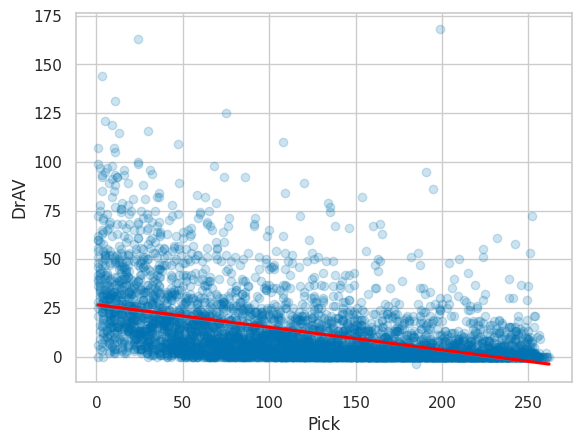

In [11]:
# Let's look at analyzing the draft now.
# We want to assign value to each draft pick to determine it's value.
# Let's start by selecting our data.
sns.set_theme(style='whitegrid', palette='colorblind')

draft_py_use_pre2019 = \
  draft_py_use\
  .query('Season <= 2019')

# Format columns as numeric or integers.
draft_py_use_pre2019 = \
  draft_py_use_pre2019\
  .astype({'Pick': int, 'DrAV': float})

sns.regplot(data=draft_py_use_pre2019,
            x='Pick',
            y='DrAV',
            line_kws={'color': 'red'},
            scatter_kws={'alpha':0.2});

plt.show()

In [12]:
# We want to smooth out this graph.
# We will replace NaN values w/ 0.
# We will calculate the six-pick moving average (6 before, 6 after)
# We will then use .groupby() to calculate the average DrAV for each pick position.
draft_chart_py = \
  draft_py_use_pre2019\
  .groupby(['Pick'])\
  .agg({'DrAV': ['mean']})

draft_chart_py.columns = \
  list(map('_'.join, draft_chart_py.columns))

draft_chart_py.loc[draft_chart_py.DrAV_mean.isnull()] = 0

draft_chart_py['roll_DrAV'] = (
    draft_chart_py['DrAV_mean']
    .rolling(window=13, min_periods=1, center=True)
    .mean()
)

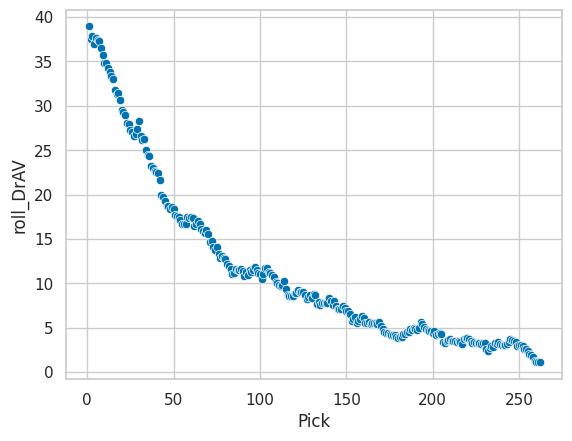

In [13]:
# Now we can plot our data
sns.scatterplot(draft_chart_py, x='Pick', y='roll_DrAV')
plt.show()

In [16]:
# Now we want to fit a model to the data to help us quantify.
# We will fit a LM to the logarithm of the data, while fixing y, then transform to an exponential function.
draft_chart_py.reset_index(inplace=True)

draft_chart_py['roll_DrAV_log'] = \
  np.log(draft_chart_py['roll_DrAV'] + 1)

DrAV_pick_fit_py = \
  smf.ols(formula='roll_DrAV_log ~ Pick',
          data=draft_chart_py)\
  .fit()

print(DrAV_pick_fit_py.summary())

                            OLS Regression Results                            
Dep. Variable:          roll_DrAV_log   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     8617.
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.35e-201
Time:                        03:11:54   Log-Likelihood:                 178.42
No. Observations:                 262   AIC:                            -352.8
Df Residuals:                     260   BIC:                            -345.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4884      0.015    228.993      0.0

In [17]:
# Now let's merge back into draft_chart and look at the data.
draft_chart_py['fitted_DrAV'] = \
  np.exp(DrAV_pick_fit_py.predict()) - 1

draft_chart_py\
  .head()

,level_0,index,Pick,DrAV_mean,roll_DrAV,roll_DrAV_log,fitted_DrAV
0,0,0,1,47.60,38.950000,3.687629,31.428778
1,1,1,2,39.85,37.575000,3.652604,31.127886
2,2,2,3,44.45,37.883333,3.660566,30.829785
3,3,3,4,31.15,36.990000,3.637323,30.534451
4,4,4,5,43.65,37.627273,3.653959,30.241856


In [18]:
# Let's adjust expectations for the model we just created.
# We take the average and standard deviation of the difference between DrAV and fitted DrAV
draft_py_use_pre2019 = \
  draft_py_use_pre2019\
  .merge(draft_chart_py[['Pick', 'fitted_DrAV']],
        on='Pick')

draft_py_use_pre2019['OE'] = (
    draft_py_use_pre2019['DrAV'] -
    draft_py_use_pre2019['fitted_DrAV']
)

draft_py_use_pre2019\
  .groupby('Tm')\
  .agg({'OE': ['count', 'mean', 'std']})\
  .reset_index()\
  .sort_values([('OE', 'mean')], ascending=False)

Tm    OE                     
        count      mean        std
26  PIT   161  3.525774  18.873699
11  GNB   180  3.373462  20.062605
8   DAL   160  2.462862  16.616522
1   ATL   148  2.292682  16.120177
21  NOR   131  2.286153  18.124209
22  NWE   176  2.164410  20.821272
13  IND   162  1.854290  15.755905
4   CAR   148  1.842769  16.505365
2   BAL   170  1.723823  16.890186
27  SEA   181  1.483275  16.949394
16  LAC   144  1.392633  14.606559
5   CHI   149  0.672768  16.051511
20  MIN   167  0.545602  13.983751
15  KAN   154  0.502626  15.016540
25  PHI   162  0.473891  15.350440
6   CIN   176  0.466698  15.812246
14  JAX   158  0.182425  13.112373
30  TEN   172  0.129590  12.662011
12  HOU   145 -0.075422  12.974443
28  SFO   184 -0.091457  13.449032
31  WAS   150 -0.449148   9.949274
24  NYJ   138 -0.551394  13.268448
0   ARI   149 -0.602462  14.294614
29  TAM   153 -0.921525  11.408413
3   BUF   161 -0.985990  12.459061
23  NYG   144 -0.999662  12.432342
17  LAR   175 -1.438906  11.983605
19  MIA   151 -1.485328  10.472036
9   DEN   159 -1.491445  12.593647
10  DET   155 -1.767026  12.060276
18  LVR   162 -2.587472  10.219390
7   CLE   170 -3.558657  10.337918